# Problem 3 – 

The following three interest rates swaps are available in the market
- A receiver swap with maturity December 30. 2017 receiving fixed semi-annual coupons of 5.1% and
paying floating quarterly 3M LIBOR trading for 0.79492002.
- A payer swap with maturity December 30. 2018 paying fixed annual coupons of 4.4% and receiving
floating semi-annual 6M LIBOR trading for −1.02540877.
- A receiver swap with maturity December 30. 2018 receiving fixed annual coupons of 4.9% and
paying floating quarterly 3M LIBOR trading for 2.05066409.


In addition to the three interest rate swaps, there are also five fixed rate bullet bonds in the market.
- A fixed rate bullet bond maturing December 30. 2017 paying quarterly simple coupons of 7 % and
a price of 103.02163487.
- A fixed rate bullet bond maturing June 30. 2018 paying semi-annual simple coupons of 5 % and a
price of 101.80152680.
- A fixed rate bullet bond maturing December 30. 2018 paying annual simple coupons of 6 % and a
price of 104.48120266.
- A fixed rate bullet bond maturing June 30. 2018 paying quarterly simple coupons of 4.5 % and a
price of 101.10990798.
- A fixed rate bullet bond maturing December 30. 2018 paying quarterly simple coupons of 5.5 %
and a price of 103.67216735.

Assume: 
- The year consists of 12 months each with exactly 30 days 
- ALL payments occur at the end of day on the last day of the quarter
- No credit risk and that the principal of all bonds is 100 and that all interest rates are annualized

**Today:** 2017-01-15. **Known fixings from December 30 2016:** 3M LIBOR = 0.052, 6M LIBOR = 0.049, 12M LIBOR 0.0476.

Swaps:
1) Price 0.79492002, semiannual fixed 5.1% (receiver), quarterly 3M LIBOR (payer), maturity 2017-12-30
2) Price −1.02540877, annual fixed 4.4% (payer), semiannual 6M LIBOR (receiver), maturity 2018-12-30
3) Price 2.05066409, annual fixed 4.9% (receiver), quarterly 3M LIBOR (payer), maturity 2018-12-30


Bonds (coupon paid simple at stated frequency, principal 100):
1) Price 103.02163487, quarterly 7%, maturity 2017-12-30
2) Price 101.80152680, semiannual 5%, maturity 2018-06-30
3) Price 104.48120266, annual 6%, maturity 2018-12-30
4) Price 101.10990798, quarterly 4.5%, maturity 2018-06-30
5) Price 103.67216735, quarterly 5.5%, maturity 2018-12-30


We generate coupon schedules from 2019-12-30 to each maturity with end-of-month payments and 30/360 accruals. We include principal at maturity. The cashflow matrix has one column per unique payment date across all bonds; entries are the cashflows on that date (coupon + principal if maturity).

## a) Cashflow matrix

a) Set up equations for the value of both the fixed- and floating legs in terms of the LIBOR fixings
and zero coupon bond prices for the three interest rate swaps.


In [2]:
import numpy as np
import pandas as pd
import fixed_income_derivatives_E2025 as fid
from datetime import date
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt

N, M = 8, 9
K = 100
T=np.array([0,5/24,11/24,17/24,23/24,29/24,35/24,41/24,47/24]) 
# T måles i ÅR (fraktioner). Fx 5/24 = 5 mdr / 24 mdr = 0.208 år. Datoerne er faktiske betalingsdatoer (incl. stub), ikke pæne 3M/6M intervaller.
C = np.zeros((N,M))
L_3M, L_6M = 0.052, 0.049
R_1, R_2, R_3 = 0.051, 0.044, 0.049
pi = np.array([
    0.79492002,     # Swap 1
   -1.02540877,     # Swap 2
    2.05066409,     # Swap 3
  103.02163487,     # Bond 4
  101.80152680,     # Bond 5
  104.48120266,     # Bond 6
  101.10990798,     # Bond 7
  103.67216735      # Bond 8
])
R_trader = 0.052
pi_trader_offer = 100.2
#First three rows are swaps, last five rows are bonds
C[0,:]=[0,-K*(0.25*L_3M+1),0.5*K*R_1,0,0.5*K*R_1+K,0,0,0,0] #Quarterly coupons, receiver swap (-), maturity 1Y, fixed R_1.
C[1,:]=[0,0,K*(0.5*L_6M+1),0,-K*R_2,0,0,0,-K*R_2-K]
C[2,:]=[0,-K*(0.25*L_3M+1),0,0,K*R_3,0,0,0,K*R_3+K]
#Bond cashflows
C[3,:]=[0,0.25*K*0.07,0.25*K*0.07,0.25*K*0.07,0.25*K*0.07+K,0,0,0,0] #Quarterly coupons, maturity 1Y
C[4,:]=[0,0,0.5*K*0.05,0,0.5*K*0.05,0,0.5*K*0.05+K,0,0] #Semiannual coupons, maturity 1.5Y
C[5,:]=[0,0,0,0,K*0.06,0,0,0,K*0.06+K] #Annual coupons, maturity 2Y
C[6,:]=[0,0.25*K*0.045,0.25*K*0.045,0.25*K*0.045,0.25*K*0.045,0.25*K*0.045,0.25*K*0.045+K,0,0] #Quarterly coupons, maturity 1.5Y
C[7,:]=[0,0.25*K*0.055,0.25*K*0.055,0.25*K*0.055,0.25*K*0.055,0.25*K*0.055,0.25*K*0.055,0.25*K*0.055, 0.25*K*0.055+K] #Quarterly coupons, maturity 2Y
print(C)



[[   0.    -101.3      2.55     0.     102.55     0.       0.       0.
     0.   ]
 [   0.       0.     102.45     0.      -4.4      0.       0.       0.
  -104.4  ]
 [   0.    -101.3      0.       0.       4.9      0.       0.       0.
   104.9  ]
 [   0.       1.75     1.75     1.75   101.75     0.       0.       0.
     0.   ]
 [   0.       0.       2.5      0.       2.5      0.     102.5      0.
     0.   ]
 [   0.       0.       0.       0.       6.       0.       0.       0.
   106.   ]
 [   0.       1.125    1.125    1.125    1.125    1.125  101.125    0.
     0.   ]
 [   0.       1.375    1.375    1.375    1.375    1.375    1.375    1.375
   101.375]]


Ignore that the first column is a zero-column. At time T=0 no future cash flow can occur, why the column is zero. At the time of trade the first cash flow is -101.3.

## b) Find rank of matrix
Construct a cashflow matrix C with each row corresponding to a traded assets. What is the rank
of this matrix? For which maturities can you compute zcb prices?


In [3]:
print(f"1b - Rank of the cashflow matrix C: {np.linalg.matrix_rank(C)}")

1b - Rank of the cashflow matrix C: 8


The rank of C is 8 and we can determine ZCB prices for: $T=[0,5/24,11/24,17/24,23/24,29/24,35/24,41/24,47/24]$, where $p(0,0)=1$.

## c) Compute ZCB prices

Compute ZCB prices for as many maturities as you can. Is the market complete? Is it arbitrage
free?

In [4]:
p = np.ones([M])
y = pi - p[0]*C[:,0]
p[1:] = np.linalg.solve(C[:,1:], y)
print(f"1c - Zero-coupon prices: {p}")
# Løs π = C*p (med p[0]=1) ⇒ får ZCB-priser p(T) ved alle tidspunkter

1c - Zero-coupon prices: [1.         0.99060312 0.9802517  0.97073639 0.96190516 0.95363276
 0.94581595 0.93836974 0.93122426]


The market is complete since we have 8 linearly independent assets and 8 future states. The ZCB prices are in the matrix above, and since all these are positive, we conclude that the market is arbitrage-free. 

## d) Term structures of ZCB, spot rates and 3M forward rates
Plot the term structures of ZCB prices, spot rates and 3M forward rates.

In [5]:
r, f_3M = np.zeros([M]), np.zeros([M])
for i in range(1,M):
    r[i] = -np.log(p[i])/T[i]
    f_3M[i] = -(np.log(p[i])-np.log(p[i-1]))/(T[i]-T[i-1])
print(f"1d - ZCB spot rates: {r}")
print(f"1d - 3M forward rates: {f_3M}")
# Spotrenter r beregnes som -ln(p)/T, forwardrenter f_3M som prisændring mellem to ZCB'er over ΔT

1d - ZCB spot rates: [0.         0.04531828 0.04351833 0.04192989 0.04052809 0.03929101
 0.03819928 0.03723584 0.03638561]
1d - 3M forward rates: [0.         0.04531828 0.04201838 0.03901773 0.03655633 0.03454886
 0.03292262 0.03161576 0.03057569]


## e) What would the prices of the 3 swaps and 5 bonds be if all spot rates were to suddenly drop by 10 basispoints?

In [6]:
r_drop, p_drop =np.zeros([M]), np.ones([M])
for i in range (1,M):
    r_drop[i] = r[i] - 0.001
    p_drop[i] = np.exp(-T[i]*r_drop[i])
pi_drop =np.matmul(C,p_drop)
print(f"1e - New spot rates: {r_drop}")
print(f"1e - New ZCB prices: {p_drop}")
print(f"1e - New bond prices: {pi_drop}")
# Parallel rentefald på 10 bp: r_drop = r - 0.001, giver nye ZCB-priser og dermed nye obligationspriser

1e - New spot rates: [0.         0.04431828 0.04251833 0.04092989 0.03952809 0.03829101
 0.03719928 0.03623584 0.03538561]
1e - New ZCB prices: [1.         0.99080952 0.98070109 0.97142423 0.96282743 0.95478576
 0.94719627 0.93997416 0.9330497 ]
1e - New bond prices: [  0.86973647  -1.1740026    2.22576323 103.11782696 101.94643885
 104.68023231 101.25333922 103.86602576]


## f) Par swap rate for swap i)

Find the par swap rate for swap i) today on January 15. 2017. That is, find the size of the fixed coupon such that it would have had a value of 0 today. Can you determine if a trader, who has
held this receiver swap since issuance, has made money simply by comparing the par swap rate at issuance to the par swap rate today.

In [7]:
S_swap = T[2]*p[2]+0.5*p[4] 
R_swap = ((0.25*L_3M+1)*p[1]-p[4])/S_swap
print(f"1f - R_swap if issued today: {R_swap}, S_swap: {S_swap}")
# S_swap = nutidsværdi af fixed-benets kuponfaktor, R_swap = par swap rente (PV_float / S_swap)


1f - R_swap if issued today: 0.04469388618153483, S_swap: 0.930234610936274


## g) Compute the accrual factor of swap i)
Compute the accrual factor of swap i) and use the accrual factor along with the new par swap rate
to find the PnL of this swap since the day of issuance.

In [8]:
PnL_swap = S_swap*(R_1-R_swap)*K
print(f"1g - Accrual factor: {S_swap} and PnL of the receiver swap if issued today: {PnL_swap}")

1g - Accrual factor: 0.930234610936274 and PnL of the receiver swap if issued today: 0.5866165334439805


## PLOTS Part 1.

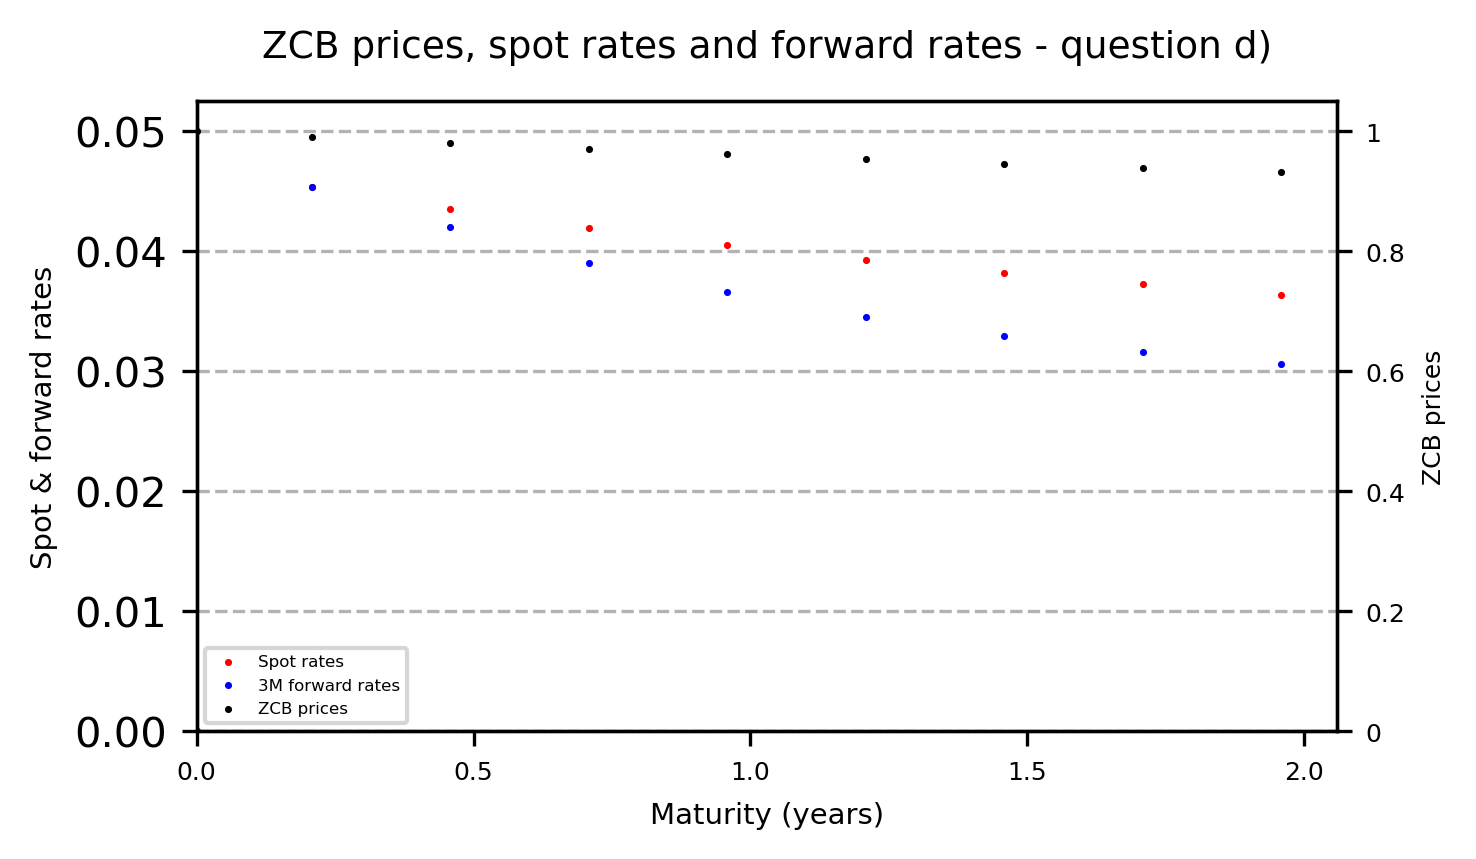

In [9]:
fig = plt.figure(constrained_layout=False, dpi=300, figsize=(5,3))
fig.suptitle("ZCB prices, spot rates and forward rates - question d)", fontsize=9)
gs = fig.add_gridspec(nrows=1, ncols=1, left=0.12, bottom=0.2, right=0.88, top=0.9, wspace=0, hspace=0)
ax = fig.add_subplot(gs[0,0])

xticks = [round(i/2,2) for i in range(0,5)]
xtick_labels = [round(i/2) for i in range(0,5)]
ax.set_xticks(xticks)
ax.set_xticklabels(xticks, fontsize=6)

# 👉 missing lines you can add
ax.set_xlim([0, max(T)+0.1])             # x-axis range
ax.set_xlabel("Maturity (years)", fontsize=7)
ax.set_ylabel("Spot & forward rates", fontsize=7)
ax.grid(axis='y', which='major', color=(0.7,0.7,0.7,0.7), linestyle='--')

ax.set_ylim([0,0.0525])

p1 = ax.scatter(T, r, s=2, color='red', marker='.', label="Spot rates")
p2 = ax.scatter(T, f_3M, s=2, color='blue', marker='.', label="3M forward rates")

ax1 = ax.twinx()
ax1.set_yticks([0,0.2,0.4,0.6,0.8,1])
ax1.set_yticklabels([0,0.2,0.4,0.6,0.8,1], fontsize=6)
ax1.set_ylim([0,1.05])
ax1.set_ylabel("ZCB prices", fontsize=6)

p3 = ax1.scatter(T, p, s=2, color='black', marker='.', label="ZCB prices")

Labels = [p1.get_label(), p2.get_label(), p3.get_label()]
ax.legend([p1, p2, p3], Labels, loc="lower left", fontsize=4)

# plt.show()


# Part 2

In this problem, we assume that the 6M Euribor rate has just been announced and that the data below for EUR FRA’s and EUR denominated swaps has just been recorded. Recall that the coupon on the fixed leg is paid annually and the coupon on the floating leg semi-annually for EUR denominated swaps.


## a) Continuously compounded term structure of ZCB spot rates
Calibrate a continuously compounded term structure of ZCB spot rates based on this data and plot
the resulting spot rates and instantaneous forward rates. Does your calibration meet the criteria of
a well-behaved yield curve?

In [10]:
import fixed_income_derivatives_E2025 as fid
# Information
EURIBOR_fixing = [
    {"id": 0, "instrument": "libor", "maturity": 1/2, "rate": 0.02750}
]
#FRA market quotes 
fra_market = [
    {"id": 1, "instrument": "fra", "exercise": 1/12, "maturity": 7/12,  "rate": 0.02980},
    {"id": 2, "instrument": "fra", "exercise": 2/12, "maturity": 8/12,  "rate": 0.03122},
    {"id": 3, "instrument": "fra", "exercise": 3/12, "maturity": 9/12,  "rate": 0.03257},
    {"id": 4, "instrument": "fra", "exercise": 4/12, "maturity": 10/12, "rate": 0.03384},
    {"id": 5, "instrument": "fra", "exercise": 5/12, "maturity": 11/12, "rate": 0.03504},
    {"id": 6, "instrument": "fra", "exercise": 6/12, "maturity": 12/12, "rate": 0.03617},
    {"id": 7, "instrument": "fra", "exercise": 7/12, "maturity": 13/12, "rate": 0.03724},
    {"id": 8, "instrument": "fra", "exercise": 8/12, "maturity": 14/12, "rate": 0.03825},
    {"id": 9, "instrument": "fra", "exercise": 9/12, "maturity": 15/12, "rate": 0.03920}
]
# Swap market quotes
swap_market = [
    {"id": 10, "instrument": "swap", "maturity":  2, "rate": 0.03782, "float_freq": "semiannual", "fixed_freq": "annual"},
    {"id": 11, "instrument": "swap", "maturity":  3, "rate": 0.04152, "float_freq": "semiannual", "fixed_freq": "annual"},
    {"id": 12, "instrument": "swap", "maturity":  4, "rate": 0.04402, "float_freq": "semiannual", "fixed_freq": "annual"},
    {"id": 13, "instrument": "swap", "maturity":  5, "rate": 0.04577, "float_freq": "semiannual", "fixed_freq": "annual"},
    {"id": 14, "instrument": "swap", "maturity":  7, "rate": 0.04797, "float_freq": "semiannual", "fixed_freq": "annual"},
    {"id": 15, "instrument": "swap", "maturity": 10, "rate": 0.04971, "float_freq": "semiannual", "fixed_freq": "annual"},
    {"id": 16, "instrument": "swap", "maturity": 15, "rate": 0.05105, "float_freq": "semiannual", "fixed_freq": "annual"},
    {"id": 17, "instrument": "swap", "maturity": 20, "rate": 0.05170, "float_freq": "semiannual", "fixed_freq": "annual"},
    {"id": 18, "instrument": "swap", "maturity": 30, "rate": 0.05230, "float_freq": "semiannual", "fixed_freq": "annual"}
]

data = EURIBOR_fixing + fra_market + swap_market


interpolation_options = {"method":"hermite", "degree":3,"transition": "smooth"}
#interpolation_options = {"method":"nelson_siegel", "transition": "smooth"}
mesh = 1/12  
M = 360
T_fit, R_fit = fid.zcb_curve_fit(data,interpolation_options=interpolation_options)
T_inter = np.array([i*mesh for i in range(0,M+1)]) # T_inter går fra 0 til 30 år med månedlige intervaller
p_inter, R_inter, f_inter, T_inter = fid.zcb_curve_interpolate(T_inter,T_fit, R_fit, interpolation_options =interpolation_options)
# Fit af ZCB-spotkurven til markedsdata og derefter interpolation på et månedligt grid (30 år).
# p_inter = ZCB-priser, R_inter = spotrenter, f_inter = forwardrenter.

In addition to the FRA’s and the swaps above, we will also consider a 10Y fixed rate bond paying a simple
semiannual coupon of 0.05 on a principal of 100 EUR. This fixed rate bond has also just been issued.

## b) Fixed rate bond (Duration and convexity)
Compute the price, yield-to-maturity, Macauley duration, modified duration and convexity of the fixed rate bond.

In [11]:
K_fr, mat_fr, cp_py_fr, cp_rate_fr = 100, 10, 2, 0.05  # Hovedstol, løbetid (år), kuponer/år, årlig kuponrate

T_fr = np.array([i/cp_py_fr for i in range(0, mat_fr*cp_py_fr+1)]) 
# Betalings-tidspunkter i år (fra 0 til maturity i trin á 1/kuponfrekvens)

C_fr = np.zeros(mat_fr*cp_py_fr+1)
# Cashflow-vektor samme længde som T_fr (starter med 0 ved t=0)

for i in range(1, mat_fr*cp_py_fr+1):
    C_fr[i] = (T_fr[i] - T_fr[i-1]) * cp_rate_fr * K_fr
# Sæt kupon-cashflows: kupon = kuponrate * accrual * principal for hvert kupon-tidspunkt

C_fr[-1] += K_fr  
# Læg hovedstolen til ved udløb

p_fr = np.array(fid.for_values_in_list_find_value_return_value(T_fr, T_inter, p_inter))
# Hent ZCB-priser p(T) for præcis de T_fr-tidspunkter (matcher mod det interpolerede grid)

price_fr = np.matmul(p_fr, C_fr)
# Pris = sum_i p(T_i) * C_i  (dotprodukt)

ytm_fr = fid.ytm(price_fr, T_fr, C_fr)
# YTM: den diskrete rente y der løser prisligningen sum(C_i/(1+y)^{T_i}) = price

D = fid.macauley_duration(price_fr, T_fr, C_fr, ytm_fr)
# Macaulay-varighed (vægtet gennemsnit af tidspunkter)

MD = fid.modified_duration(price_fr, T_fr, C_fr, ytm_fr)
# Modified duration = D/(1+ytm) (prisfølsomhed pr. renteskift)

K = fid.convexity(price_fr, T_fr, C_fr, ytm_fr)
# Konveksitet (2.-ordens prisfølsomhed)

print(f"2b - Fixed rate bond price: {price_fr}, YTM: {ytm_fr}, D: {D}, MD: {MD}, Convexity: {K}")


2b - Fixed rate bond price: 100.71686482250954, YTM: 0.04968658571468779, D: 7.997947970192319, MD: 7.619367608424614, Convexity: 73.46534699495525


## c) Percentage change in the price of the fixed rate bond 
Use an expansion to estimate the percentage change in the price of the fixed rate bond 
for a 10 bps increase in the yield-to-maturity first using only duration and second using both duration and convexity. Compare the two numbers and asses whether also using convexity has changed your estimate significantly.

In [12]:
delta_ytm = 0.001 # 10 basis points increase in YTM
pct_chg_D=-MD * delta_ytm 
pct_chg_D_and_K = -MD * delta_ytm + 0.5 * (K+D)*(delta_ytm/(1+ytm_fr))**2
print(f"2c - Estimated percentage change using Duration only: {-MD*delta_ytm}, using duration and Convexity: {pct_chg_D_and_K}")

2c - Estimated percentage change using Duration only: -0.007619367608424615, using duration and Convexity: -0.007582400738278342


## d) Compute accrual factor and par swap rate of 3Y payer swap
Now compute the accrual factor and par swap rate of the 3Y payer swap knowing that the swap has just been issued and that it therefore has a value of 0.

In [24]:
K_3Y_swap = 100
T_3Y_swap_fixed_leg = np.array([i for i in range(0,4)])  # Årlige betalinger i årene 0,1,2,3
p_3Y_swap_fixed_leg = np.array(fid.for_values_in_list_find_value_return_value(
    T_3Y_swap_fixed_leg, T_inter, p_inter))

# Beregn accrual factor (S_3Y_swap)
S_3Y_swap = 0
for i in range(1, len(T_3Y_swap_fixed_leg)):
    S_3Y_swap += (T_3Y_swap_fixed_leg[i] - T_3Y_swap_fixed_leg[i-1]) * p_3Y_swap_fixed_leg[i]

# Beregn par swap-renten
R_3Y_swap = (1 - p_3Y_swap_fixed_leg[-1]) / S_3Y_swap

print(f"2d - 3Y payer swap. S_3Y_swap: {S_3Y_swap}, R_3Y_swap: {R_3Y_swap}")


2d - 3Y payer swap. S_3Y_swap: 2.781668129005215, R_3Y_swap: 0.04152000000035355


## e) Compute accrual factor and par swap rate of 10Y receiver swap
Also compute the accrual factor and par swap rate of the 10Y receiver swap again using that the swap has just been issued and has a value of 0.

In [25]:
K_10Y_swap = 100 # Principal 
T_10Y_swap_fixed_leg = np.arange(0, 11)  # Årlige betalinger 0–10
p_10Y_swap_fixed_leg = np.array(fid.for_values_in_list_find_value_return_value(
    T_10Y_swap_fixed_leg, T_inter, p_inter))

S_10Y_swap = 0
for i in range(1, len(T_10Y_swap_fixed_leg)):
    S_10Y_swap += (T_10Y_swap_fixed_leg[i] - T_10Y_swap_fixed_leg[i-1]) * p_10Y_swap_fixed_leg[i]

R_10Y_swap = (1 - p_10Y_swap_fixed_leg[-1]) / S_10Y_swap
print(f"10Y receiver swap: S_10Y_swap = {S_10Y_swap}, R_10Y_swap = {R_10Y_swap}")

10Y receiver swap: S_10Y_swap = 7.828976215725373, R_10Y_swap = 0.049710000000265805


In the following, we will use the 3Y and 10Y swaps to hedge the risk to a long position in the fixed rate bond. First consider the case of a 10 bps increase in all ZCB spot rates.

## f) Compute the PnL of the fixed rate bond, the 3Y payer swap and the 10Y receiver swap 
resulting from the increase in ZCB yields assuming the swaps have a principal of 100.

In [ ]:
delta_r = 0.001          # 10 basis points = 0.1%
r_up = R_inter + delta_r # ny rentekurve (alle renter hævet med 0.1%)
p_up = np.exp(-r_up * T_inter) # nye ZCB-priser p'(T) = e^{-rT}

#I følge p_up vil højere renter betyde lavere ZCB-priser.

p_fr_up = fid.for_values_in_list_find_value_return_value(T_fr, T_inter, p_up) #ZCB-priser til de specifikke tidspunkter (efter rentestigning).
price_fr_up = np.matmul(p_fr_up, C_fr) #Pris efter rentestigning
PnL_fr = price_fr_up - price_fr #Ny pris - gammel pris

p_3Y_up = fid.for_values_in_list_find_value_return_value(T_3Y_swap_fixed_leg, T_inter, p_up) 

S_3Y_swap_up = np.sum(np.diff(T_3Y_swap_fixed_leg) * p_3Y_up[1:])

    #den diskonterede sum af kuponperioder, dvs. accrual factor. Den bruges til at regne værdien af det faste ben i swap’en.

#3y ppayer swap pris efter rentestigning
price_3Y_up = (1 - p_3Y_up[-1] - R_3Y_swap * S_3Y_swap_up) * K_3Y_swap
PnL_3Y = price_3Y_up
#Intuition: En payer swap stiger i værdi, når renterne stiger, fordi du betaler en fast rente, der nu er lavere end markedsrenten, mens du modtager en højere flydende rente fremover.

#10y receiver swap pris efter rentestigning
p_10Y_up = fid.for_values_in_list_find_value_return_value(T_10Y_swap_fixed_leg, T_inter, p_up)
S_10Y_swap_up = 0
for i in range(1, len(T_10Y_swap_fixed_leg)):
    S_10Y_swap_up += (T_10Y_swap_fixed_leg[i] - T_10Y_swap_fixed_leg[i-1]) * p_10Y_up[i]

price_10Y_up = (R_10Y_swap * S_10Y_swap_up + p_10Y_up[-1] - 1) * K_10Y_swap
PnL_10Y = price_10Y_up
#En receiver swap falder i værdi, når renterne stiger, fordi du modtager en fast rente, 
# der nu er lavere end markedsrenten, mens du skal betale en højere flydende rente fremover.

print("2f - PnL efter en 10 bps rentestigning:")
print(f"  Fixed rate bond PnL:   {float(PnL_fr):.6f}")
print(f"  3Y payer swap PnL:     {float(PnL_3Y):.6f}")
print(f"  10Y receiver swap PnL: {float(PnL_10Y):.6f}")

# Obligation (fixed rate bond) → taber værdi, når renterne stiger
# 3Y payer swap → stiger i værdi, fordi du betaler fast og modtager højere flydende rente fremover
# 10Y receiver swap → falder i værdi, fordi du modtager en fast rente, der nu er lavere end markedet


2f - PnL efter en 10 bps rentestigning:
  Fixed rate bond PnL:   -0.798434
  3Y payer swap PnL:     0.287676
  10Y receiver swap PnL: -0.804657


## g) Principal of swap hedging with 3Y payer swap
In order to hedge the long position in the fixed rate bond against a 10 bps increase in ZCB spot rates using only the 3Y payer swap, what should the principal of the swap be?

- Når man har en long position satser man på, at renten falder, og taber derfor penge på en stigning i renten.
- En payer swap stiger i værdi, når renterne stiger.

Ved at tage en passende størrelse af payer swap, kan vi gøre så dens gevinst = obligationens tab.



In [33]:
K_hedge_3Y = -100 * (PnL_fr / PnL_3Y)
print(f"3Y payer swap notional to hedge bond should have a principal of: {K_hedge_3Y:.2f}")


3Y payer swap notional to hedge bond should have a principal of: 277.55


## h) Principal of swap hedging with 10Y receiver swap
In order to hedge the long position in the fixed rate bond against a 10 bps increase in ZCB spot rates using only the 10Y receiver swap, what should the principal of the swap be?

Nu skal vi så bruge 10Y receiver swap til at hedge.
- En receiver swap taber værdi, når renterne stiger. 

Så man kan ikke hedge direkte med samme retning — man bliver nødt til at tage den modsatte position i swap’en, dvs. være short receiver swap

In [34]:
K_hedge_10Y = -100 * (PnL_fr / PnL_10Y)
print(f"10Y receiver swap notional to hedge bond: {K_hedge_10Y:.2f}")

10Y receiver swap notional to hedge bond: -99.23


## i) Relate the size of the hedging positions 
Relate the size of the hedging positions to the duration of the fixed rate bond and the accrual factors of each of the swaps.

- Duration måler, hvor følsom en obligations (eller et instruments) pris er over for ændringer i renten.
- Modified duration: hvor mange procent falder prisen, hvis renten stiger 1 procentpoint.



Størrelsen på afdækningen afhænger af, hvor følsom obligationen og swappene er overfor renteændringer.
- Obligationens varighed viser, hvor meget dens pris ændres, når renten ændrer sig.
- Swappens accrual factor viser noget lignende, hvor følsom den faste ben af swappen er.

Fordi obligationen har en høj varighed (ca. 7,8 år), mens 3-års swappen kun har en lille accrual factor (ca. 2,8), skal man bruge en stor swap (principal ≈ 277) for at dække risikoen.
10-års swappen har næsten samme følsomhed som obligationen (accrual factor ≈ 7,9), men her skal man kun bruge en swap på omkring 100 for at opnå afdækning. 

Next, consider a 10 bps increase in all market rates. Strictly speaking the 6M LIBOR rate, the FRA
rates and the swap rates are of different types but nevertheless simple ad 10 bps to the data in the table
above.

## j) Compute the PnL of the fixed rate bond, the 3Y payer swap and the 10Y receiver swap resulting from the increase in market rates assuming the swaps have a principal of 100.